<a href="https://colab.research.google.com/github/sensei-jirving/Online-DS-PT-01.24.22-cohort-notes/blob/main/Week_04/Lecture_01/sample_explanatory_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Data
path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRQpH02vlgxAwATTUhJBC0MGiciSz-vUPenWNbrkVH4ijb12NXK-4ut0jLqbANnBgRUo36ZAXDfeQKa/pub?output=csv" #'/content/Life Expectancy Data.csv'
df = pd.read_csv(path)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# Some data cleaning to remove missing data and remove some suspicious 0s
df.columns = df.columns.str.strip()
df = df.drop_duplicates()
df = df.dropna()
df = df[df['Schooling'] != 0]
df = df[df['GDP'] != 0]
df = df[df['Life expectancy'] != 0]
df = df[df['Year'] != 2015]

In [ ]:
# Pair Plot to identify correlations to explore
# commented out because it takes a long time to run
# sns.pairplot(df)

# Does schooling affect life expectancy?

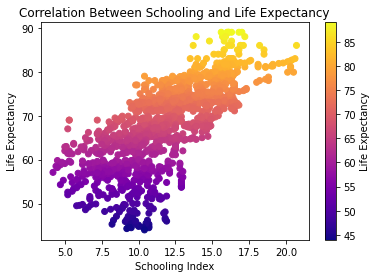

In [ ]:
plt.scatter(df['Schooling'], df['Life expectancy'], c=df['Life expectancy'], cmap='plasma')
plt.colorbar(label='Life Expectancy')
plt.title('Correlation Between Schooling and Life Expectancy')
plt.xlabel('Schooling Index')
plt.ylabel('Life Expectancy')
plt.show()

#### We can clearly see a strong correlation between schooling and life expectancy.  Nations interested in increasing the life expectancy of their residence should improve the education available to them.

# Is it schooling or GDP that changes life expectancy?

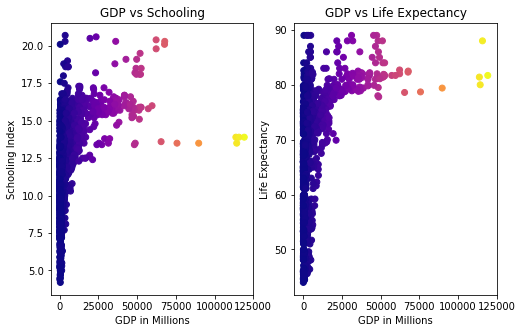

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8,5))

axes[0].scatter(df['GDP'], df['Schooling'], c=df['GDP'], cmap='plasma')
axes[0].set_title('GDP vs Schooling')
axes[0].set_xlabel('GDP in Millions')
axes[0].set_ylabel('Schooling Index')

axes[1].scatter(df['GDP'], df['Life expectancy'], c=df['GDP'], cmap='plasma')
axes[1].set_title('GDP vs Life Expectancy')
axes[1].set_ylabel('Life Expectancy')
axes[1].set_xlabel('GDP in Millions')

plt.show()

#### It does seem that schooling and life expectancy have a similar relationship with GDP.  Perhaps wealthier nations tend to spend more on schooling and also have higher life expectancy.  

# How does the development status of a country affect schooling and life expectancy?

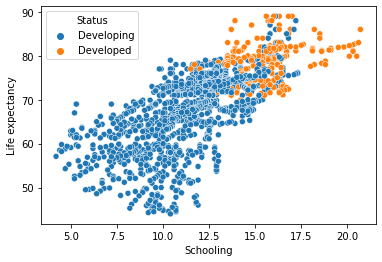

In [ ]:
sns.scatterplot(data=df, x='Schooling', y='Life expectancy', hue='Status')
plt.savefig('/content/scatterplot_life_schooling.png')

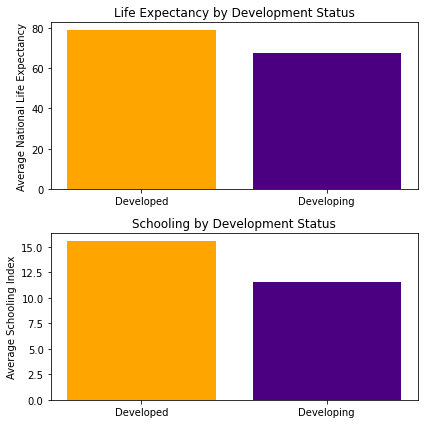

In [ ]:
status_groups = df.groupby('Status').mean()
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(211)
ax1.bar(status_groups.index, status_groups['Life expectancy'],
       color=['orange','indigo'])
ax1.set_ylabel('Average National Life Expectancy')
ax1.set_title('Life Expectancy by Development Status')

ax2 = fig.add_subplot(212)
ax2.bar(status_groups.index, status_groups['Schooling'],
       color=['orange','indigo'])
ax2.set_ylabel('Average Schooling Index')
ax2.set_title('Schooling by Development Status')

plt.tight_layout()
plt.savefig('/content/bar_chart.png')
plt.show()

#### Developed nations tend to be wealthier than developing nations, so this reinforces the idea that GDP, development, schooling, and life expectancy are all correlated.  However, in the above scatterplot we can also see that among both developed and developing countries there is a correlation between schooling and life expectancy.

# How have schooling and life expectancy changed over time?

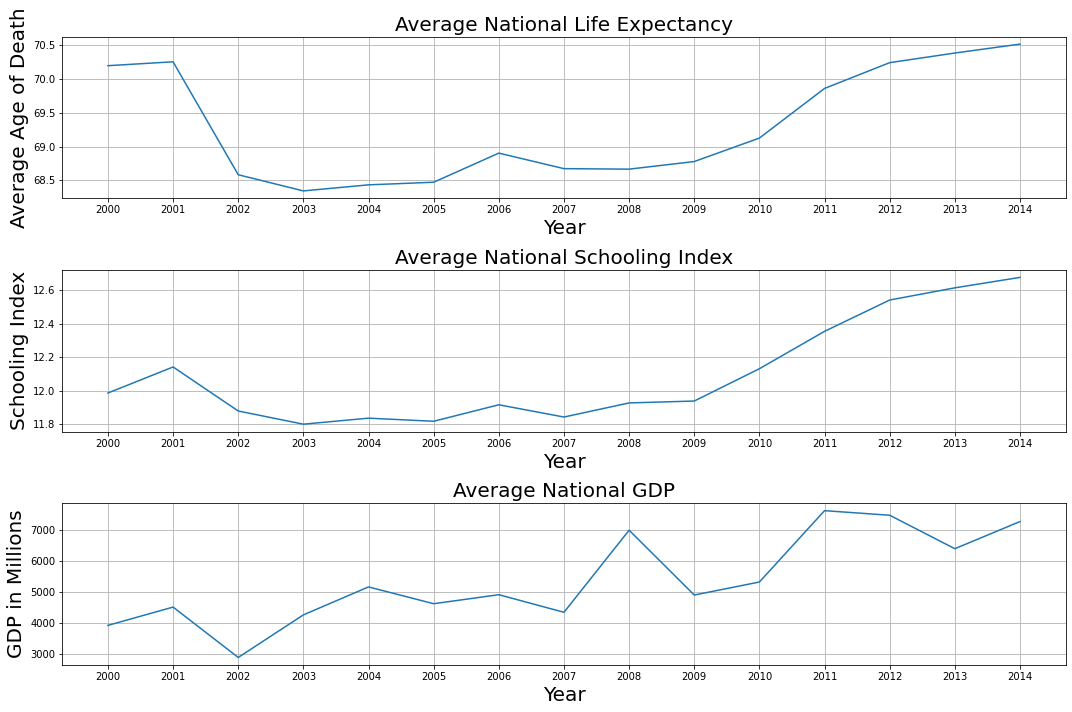

In [ ]:
#group the data by year
year_group = df.groupby('Year').mean()

#Create figure with 3 subplots
fig, axes = plt.subplots(3,1, figsize=(15,10))

axes[0].plot(year_group.index, year_group['Life expectancy'])
axes[0].set_title('Average National Life Expectancy', fontsize=20)
axes[0].set_ylabel('Average Age of Death', fontsize=20)
axes[0].set_xlabel("Year", fontsize=20)
axes[0].set_xticks(year_group.index)
axes[0].grid()

axes[1].plot(year_group.index, year_group['Schooling'])
axes[1].set_title('Average National Schooling Index', fontsize=20)
axes[1].set_ylabel('Schooling Index', fontsize=20)
axes[1].set_xlabel("Year", fontsize=20)
axes[1].set_xticks(year_group.index)
axes[1].grid()

axes[2].plot(year_group.index, year_group['GDP'])
axes[2].set_title('Average National GDP', fontsize=20)
axes[2].set_ylabel('GDP in Millions', fontsize=20)
axes[2].set_xlabel("Year", fontsize=20)
axes[2].set_xticks(year_group.index)
axes[2].grid()

plt.tight_layout()
plt.savefig('/content/time_data.png')
plt.show()

#### It seems that nations with higher GDPs tend to have better schools and higher life expectancies.  However, the similarities in the trends of life expectancy over time seem to more closely follow the trends in schooling.  If more educated adults lived longer, then we would expect to see a lag.  Since schooling seems to follow life expectancy for the same year, perhaps schools provide a safe haven for students and reduce deaths.  According to this data nations should seek to improve access to education in order to raise life expectancy.

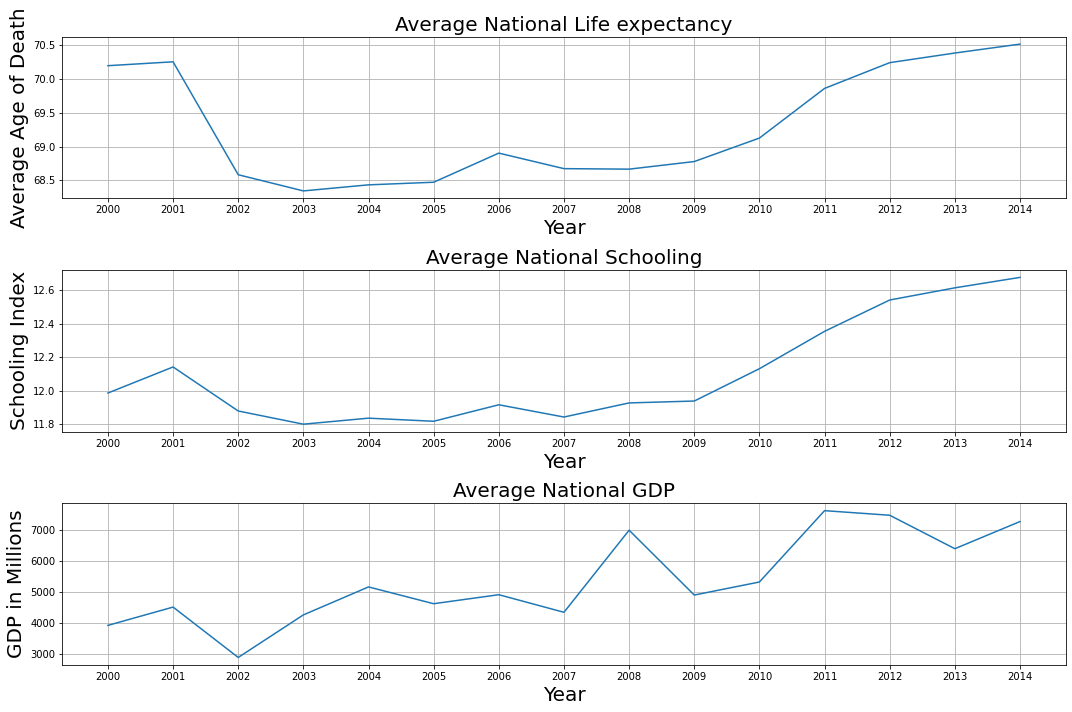

In [ ]:
# Another way to make the above graph using a loop
year_group = df.groupby('Year').mean()

fig, axes = plt.subplots(3,1, figsize=(15,10))

columns = ['Life expectancy', 'Schooling', 'GDP']
ylabels = ['Average Age of Death', 'Schooling Index', 'GDP in Millions']

#loop over axes, columns, and labels
for i, col in enumerate(columns):

    axes[i].plot(year_group.index, year_group[col])
    axes[i].set_title(f'Average National {col}', fontsize=20)
    axes[i].set_ylabel(ylabels[i], fontsize=20)
    axes[i].set_xlabel("Year", fontsize=20)
    axes[i].set_xticks(year_group.index)
    axes[i].grid()
    
plt.tight_layout()
plt.show()